In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

In [10]:
def learning_algorithm(maze, end_state, number_of_episodes = 50, max_steps = 30000, epsilon = 0.1, alfa = 0.7, gamma = 0.9):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()


    # Set algorithm parameters
    # number_of_episodes = 50
    # max_steps = 30000
    # epsilon = 0.1
    # alfa = 0.7
    # gamma = 0.9
    def cycle():
        """
        A method that simulates one cycle/episode of the robot
        It stops when it makes at most 30000 steps or when it reaches the goal
        :return:
        """
        end_cycle = False
        step = 0
        while not end_cycle:
            # Select an action
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            # get current state
            current_state = robot.get_state(maze)
            # do the step and get the next state
            state_next = robot.do_action(action, maze)
            # get reward from the action
            reward = maze.get_reward(state_next)
            # get possible actions
            possible_actions = maze.get_valid_actions(robot)
            # update the Q-table (Q(s, a))
            learn.update_q(current_state, action, reward, state_next, possible_actions, alfa, gamma)

            # increase the step counter
            step += 1
            if step == max_steps or robot.get_state(maze) == end_state:
                end_cycle = True
                num_of_steps.append(robot.nr_of_actions_since_reset)
                robot.reset()

    # keep learning until you decide to stop
    stop = False
    episode = 1
    num_of_steps = []
    while not stop:

        # run a cycle
        cycle()

        # TODO figure out a stopping criterion
        # stop when we reach number_of_episodes
        episode += 1
        if episode > number_of_episodes:
            stop = True
    # Return list with the number of steps each cycle took
    return num_of_steps

In [11]:
# Run everything num times
num = 10

# Load the maze
file = "../data/toy_maze.txt"
maze_toy = Maze(file)

# Set the reward at the bottom right to 10
maze_toy.set_reward(maze_toy.get_state(9, 9), 10)
toy_data = []
for i in range(num):
    num_list = learning_algorithm(maze_toy, end_state=maze_toy.get_state(9, 9))
    toy_data.append(num_list)

# Load the maze
file = "../data/easy_maze.txt"
maze_easy = Maze(file)

# Set the reward at the bottom right to 10
maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
easy_data = []
for i in range(num):
    num_list = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=maze_easy.get_state(24, 14))
    easy_data.append(num_list)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
1022
852
884
78
688
1458
298
170
132
398
1080
324
130
454
54
158
42
76
238
216
50
100
72
60
40
26
30
32
24
26
24
26
28
26
26
28
26
24
32
30
26
24
28
26
24
24
26
28
28
24
Made EGreedy
3382
758
272
3406
328
142
218
660
282
334
496
154
118
270
274
148
116
86
40
72
248
42
28
26
38
30
28
24
26
32
28
24
24
26
24
30
24
26
26
26
24
34
24
26
30
26
28
28
26
26
Made EGreedy
478
370
404
694
788
1916
494
1470
92
180
312
164
492
300
254
212
374
308
134
66
324
78
60
92
770
64
30
56
36
28
24
24
30
32
24
24
26
26
24
28
24
28
26
26
24
24
26
30
26
30
Made EGreedy
1698
678
148
622
868
298
1416
842
624
128
340
700
116
172
514
64
154
220
92
166
192
320
250
50
106
34
26
28
24
34
24
24
40
28
24
130
26
30
30
26
26
26
24
26
34
28
28
26
26
24
Made EGreedy
498
1844
948
1028
462
446
184
322
84
840
118
220
194
114
54
236
314
160
40
32
44
62
34
34
26
24
28
28
38
26
28
24
24
26
24
28
34
34
26
26
24
26
28
38
26
24
26
24
28
26
Made EGreedy
358
1206
968
2276
526


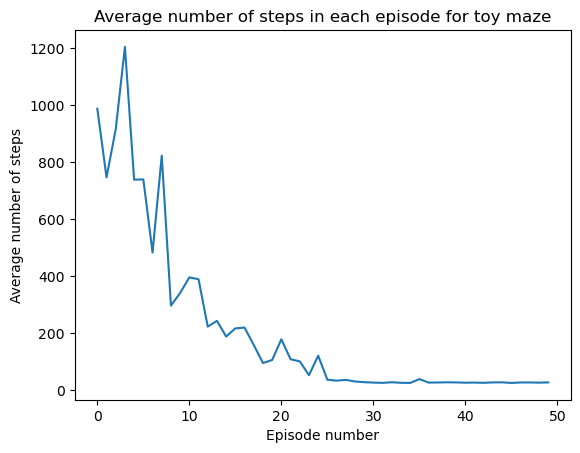

Average route over  10  runs in the last episode is:  27.6


In [13]:
plt.plot(np.average(toy_data, axis=0))
plt.title("Average number of steps in each episode for toy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

print("Average route over ", num, " runs in the last episode is: ", np.average(toy_data, axis=0)[-1])

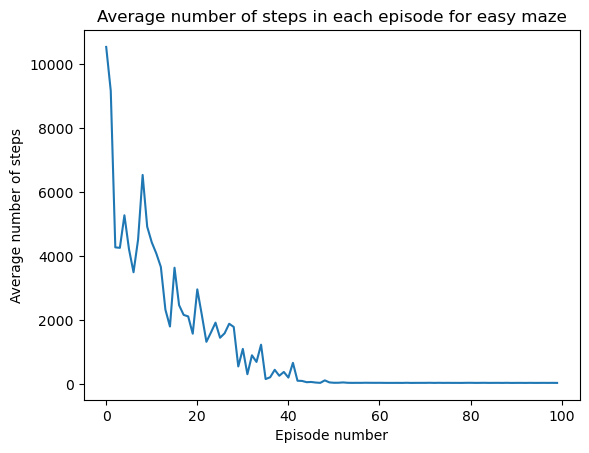

Average route over  10  runs in the last episode is:  41.6


In [14]:
plt.plot(np.average(easy_data, axis=0))
plt.title("Average number of steps in each episode for easy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data, axis=0)[-1])